In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd

In [38]:
fertility_data = pd.read_csv("clean_fertility.csv", index_col='State')
income_data = pd.read_csv("clean_income.csv", index_col='State')

In [39]:
fertility_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, Guam to Total United States
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2008    57 non-null     float64
 1   2009    57 non-null     float64
 2   2010    57 non-null     float64
 3   2011    57 non-null     float64
 4   2012    57 non-null     float64
 5   2013    57 non-null     float64
 6   2014    57 non-null     float64
 7   2015    57 non-null     float64
 8   2016    57 non-null     float64
 9   2017    56 non-null     float64
 10  2018    55 non-null     float64
 11  2019    55 non-null     float64
 12  2020    56 non-null     float64
 13  2021    56 non-null     float64
 14  2022    56 non-null     float64
dtypes: float64(15)
memory usage: 7.1+ KB


In [40]:
fertility_data['Growth Rate'] = ((fertility_data['2022'] - fertility_data['2008']) / fertility_data['2008']) * 100
fertility_data['Growth Rate'] = fertility_data['Growth Rate'].round(2)
fertility_data['Growth Rate']

State
Guam                   -17.22
American Samoa            NaN
South Dakota           -14.47
Nebraska               -15.28
Alaska                 -21.58
Louisiana              -11.06
Utah                   -28.85
Iowa                   -12.80
North Dakota           -13.62
Texas                  -22.03
Kansas                 -18.67
Kentucky               -11.65
Idaho                  -26.72
Oklahoma               -18.55
Arkansas               -17.13
Mississippi            -18.64
Indiana                -14.83
Minnesota              -17.06
New Jersey             -15.05
Alabama                -15.53
Hawaii                 -25.64
Northern Mariana Is.   -24.78
Tennessee              -16.43
Delaware               -18.96
Missouri               -16.59
North Carolina         -19.34
Ohio                   -14.57
South Carolina         -20.19
Maryland               -16.75
Wyoming                -25.88
Georgia                -23.04
Virginia               -18.32
Wisconsin              -17.50
Flor

In [41]:
fertility_data = fertility_data.dropna(subset=['Growth Rate'])

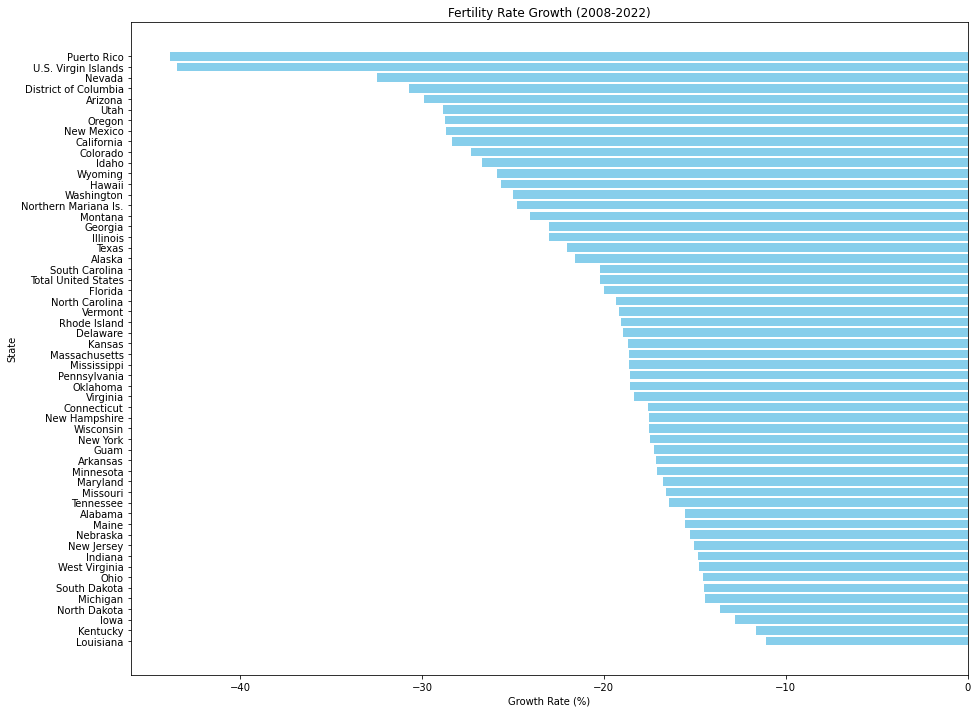

In [45]:
fertility_data_sorted = fertility_data.sort_values(by='Growth Rate', ascending=False)

plt.figure(figsize=(15, 12))
plt.barh(fertility_data_sorted.index, fertility_data_sorted['Growth Rate'], color='skyblue')
plt.xlabel('Growth Rate (%)')
plt.ylabel('State')
plt.title('Fertility Rate Growth (2008-2022)')
plt.show()


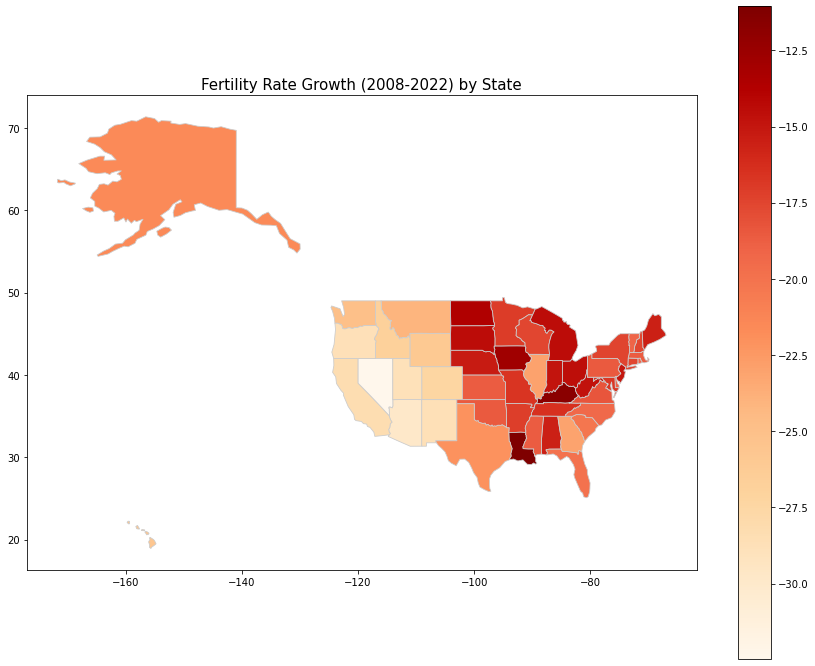

In [46]:
# Load the shapefile from your local directory
shapefile_path = '/Users/aaron/Desktop/Code/fertility_rates/bordermap/ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp'
usa = gpd.read_file(shapefile_path)

# Filter for the United States (if needed)
usa = usa[usa['admin'] == 'United States of America']

# Simplify to just the states
usa = usa[['geometry', 'name']]

# Rename the 'name' column to 'State' for merging
usa = usa.rename(columns={'name': 'State'})

# Merge the fertility data with the USA shapefile data
fertility_data_sorted['State'] = fertility_data_sorted.index  # Add the State column back for merging
merged = usa.set_index('State').join(fertility_data_sorted, how='inner')

# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
merged.plot(column='Growth Rate', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add a title
plt.title('Fertility Rate Growth (2008-2022) by State', fontsize=15)
plt.show()